In [1]:
from src.rel_prop.min_max_rel_model import MinMaxModel
from src.models.Binary_Mnist_Model import Montavon_Classifier

In [2]:
mc = Montavon_Classifier(class_nb=8, load_model=True)
mc.set_data(test_size=0.2)
mc.set_model()

Train images: 21840, train labels: 21840
Load model


In [8]:
if mc.train_labels[0]==1:
    print(True)

True


In [3]:
mc.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 400)               313600    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               40000     
_________________________________________________________________
dense_2 (Dense)              (None, 400)               40000     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 400       
Total params: 394,000
Trainable params: 353,600
Non-trainable params: 40,400
_________________________________________________________________


In [4]:
mc.fit_model(epochs=300, batch_size=32)

Model has been load, no need to train!


Prediction: 0
Prediction: 0
Prediction: 0
Prediction: 1


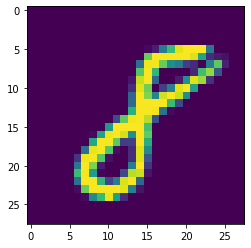

In [11]:
import matplotlib.pyplot as plt

i=-1
while True:
    i+=1
    pred = mc.predict_test_image(index=i)
    print("Prediction: {}".format(pred))
    if pred==1:
        plt.imshow(mc.train_images[i])
        break
        

In [5]:
minmax = MinMaxModel(classifier=mc)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 400)               313600    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               40000     
_________________________________________________________________
dense_2 (Dense)              (None, 400)               40000     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 400       
Total params: 394,000
Trainable params: 353,600
Non-trainable params: 40,400
_________________________________________________________________
MODEL SUMMARY: 
None
Model: "sequential"
_________________________________________________________________
Laye

ValueError: You called `set_weights(weights)` on layer "sequential" with a weight list of length 4, but the layer was expecting 3 weights. Provided weights: [array([[ 0.06035503,  0.0710785 , -0.06379894, .....

In [ ]:
minmax.train_min_max(pretrained=False)

In [ ]:
r = minmax.min_max_rel_prop(index=1)